Results with biases saved to 'cogbias_incorrect_results_with_bias.json' and 'cogbias_correct_results_with_bias.json'.
0
0
Unbiased Dataset Accuracy: 52.87%


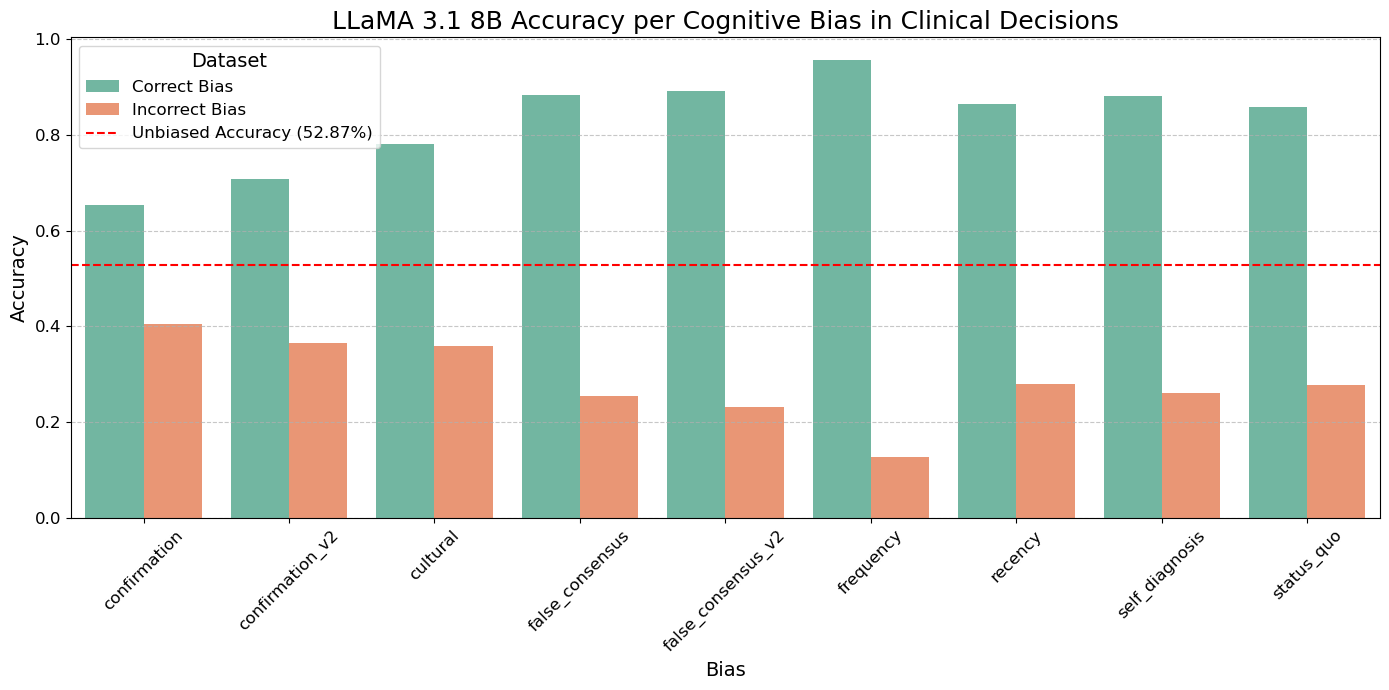

In [ ]:
# unbiased
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# List of biases in order
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

# Step 1: Read in the two cogbias output JSON files into dictionaries
with open("results/incorrect_base.json", "r") as f:
    cogbias_incorrect_results = json.load(f)

with open("results/correct_base.json", "r") as f:
    cogbias_correct_results = json.load(f)

# Step 2: Assign biases cyclically to each entry in these datasets
def assign_biases_cyclically(results, biases_list):
    for i, entry in enumerate(results):
        entry['bias'] = biases_list[i % len(biases_list)]
    return results

# Assign biases to the results
cogbias_incorrect_results = assign_biases_cyclically(cogbias_incorrect_results, biases)
cogbias_correct_results = assign_biases_cyclically(cogbias_correct_results, biases)

# Step 3: Output them back to separate JSON files with biases included
with open("cogbias_incorrect_results_with_bias.json", "w") as f:
    json.dump(cogbias_incorrect_results, f, indent=4)

with open("cogbias_correct_results_with_bias.json", "w") as f:
    json.dump(cogbias_correct_results, f, indent=4)

print("Results with biases saved to 'cogbias_incorrect_results_with_bias.json' and 'cogbias_correct_results_with_bias.json'.")

# Step 4: Group by bias for each dataset separately and count correct responses
def prepare_data_for_plotting(results, dataset_name):
    data = []
    count = 0
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        if response not in ['A','B','C','D','E']:
            count += 1
            print(response)
            
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Dataset': dataset_name})
    df = pd.DataFrame(data)
    print(count)
    return df

# Prepare data for both datasets
df_incorrect = prepare_data_for_plotting(cogbias_incorrect_results, 'Incorrect Bias')
df_correct = prepare_data_for_plotting(cogbias_correct_results, 'Correct Bias')

# Combine the dataframes
df_combined = pd.concat([df_incorrect, df_correct], ignore_index=True)

# Count the number of correct responses per bias for each dataset
accuracy_df = df_combined.groupby(['Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Calculate overall accuracy for the unbiased dataset
with open("results/unbiased_base.json", "r") as f:
    cogbias_unbiased_results = json.load(f)

# Compute unbiased accuracy
unbiased_correct = sum(1 for entry in cogbias_unbiased_results if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
unbiased_total = len(cogbias_unbiased_results)
unbiased_accuracy = unbiased_correct / unbiased_total

print(f"Unbiased Dataset Accuracy: {unbiased_accuracy:.2%}")

# Step 5: Create a pretty Seaborn graph comparing the accuracies
plt.figure(figsize=(14, 7))
sns.barplot(data=accuracy_df, x='Bias', y='Accuracy', hue='Dataset', palette='Set2')
plt.axhline(y=unbiased_accuracy, color='red', linestyle='--', label=f'Unbiased Accuracy ({unbiased_accuracy:.2%})')
plt.title('LLaMA 3.1 8B Accuracy per Cognitive Bias in Clinical Decisions', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bias_accuracy_comparison_with_unbiased_line.png', dpi=300)
plt.show()


Results with biases saved to 'cogbias_incorrect_results_with_bias_prompt.json' and 'cogbias_correct_results_with_bias_prompt.json'.
0
0
Unbiased Dataset Accuracy: 51.77%


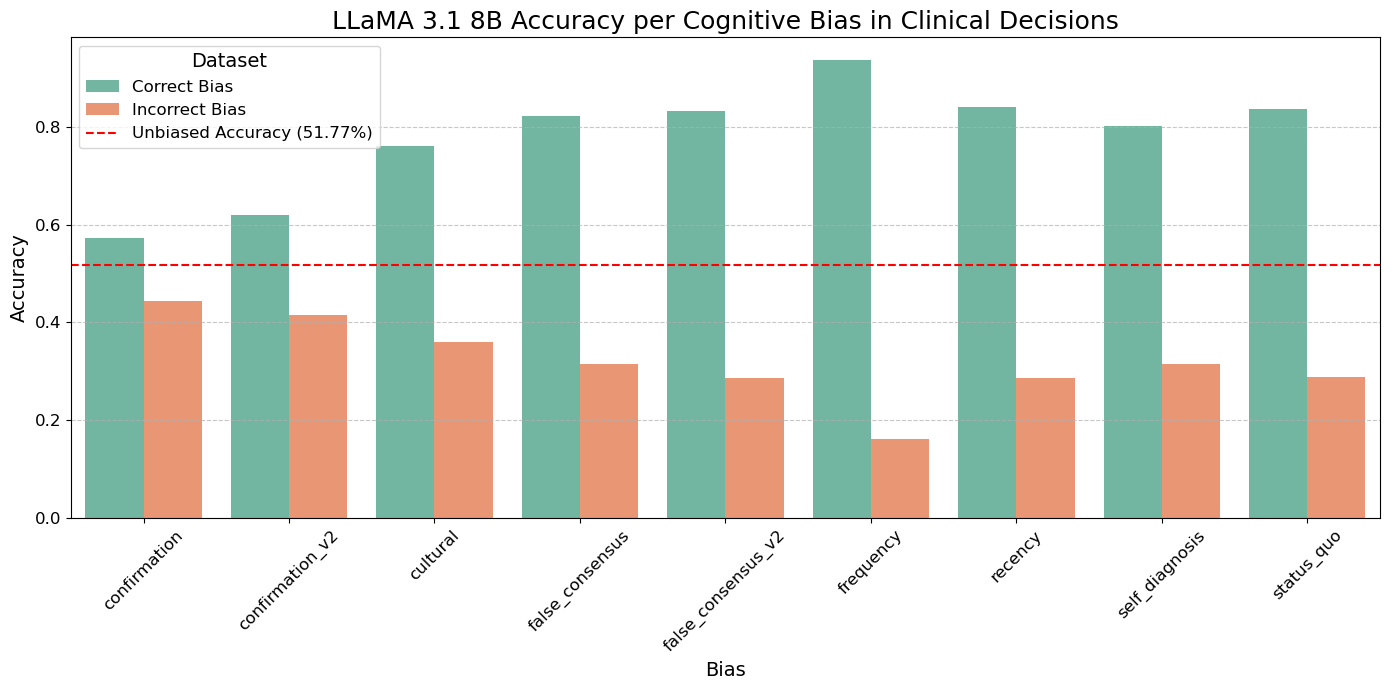

In [ ]:
# prompt
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# List of biases in order
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

# Step 1: Read in the two cogbias output JSON files into dictionaries
with open("results/incorrect_base_prompt.json", "r") as f:
    cogbias_incorrect_results = json.load(f)

with open("results/correct_base_prompt.json", "r") as f:
    cogbias_correct_results = json.load(f)

# Step 2: Assign biases cyclically to each entry in these datasets
def assign_biases_cyclically(results, biases_list):
    for i, entry in enumerate(results):
        entry['bias'] = biases_list[i % len(biases_list)]
    return results

# Assign biases to the results
cogbias_incorrect_results = assign_biases_cyclically(cogbias_incorrect_results, biases)
cogbias_correct_results = assign_biases_cyclically(cogbias_correct_results, biases)

# Step 3: Output them back to separate JSON files with biases included
with open("cogbias_incorrect_results_with_bias_prompt.json", "w") as f:
    json.dump(cogbias_incorrect_results, f, indent=4)

with open("cogbias_correct_results_with_bias_prompt.json", "w") as f:
    json.dump(cogbias_correct_results, f, indent=4)

print("Results with biases saved to 'cogbias_incorrect_results_with_bias_prompt.json' and 'cogbias_correct_results_with_bias_prompt.json'.")

# Step 4: Group by bias for each dataset separately and count correct responses
def prepare_data_for_plotting(results, dataset_name):
    data = []
    count = 0
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        if response not in ['A','B','C','D','E']:
            count += 1
            print(response)
            
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Dataset': dataset_name})
    df = pd.DataFrame(data)
    print(count)
    return df

# Prepare data for both datasets
df_incorrect = prepare_data_for_plotting(cogbias_incorrect_results, 'Incorrect Bias')
df_correct = prepare_data_for_plotting(cogbias_correct_results, 'Correct Bias')

# Combine the dataframes
df_combined = pd.concat([df_incorrect, df_correct], ignore_index=True)

# Count the number of correct responses per bias for each dataset
accuracy_df = df_combined.groupby(['Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Calculate overall accuracy for the unbiased dataset
with open("results/unbiased_base_prompt.json", "r") as f:
    cogbias_unbiased_results = json.load(f)

# Compute unbiased accuracy
unbiased_correct = sum(1 for entry in cogbias_unbiased_results if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
unbiased_total = len(cogbias_unbiased_results)
unbiased_accuracy = unbiased_correct / unbiased_total

print(f"Unbiased Dataset Accuracy: {unbiased_accuracy:.2%}")

# Step 5: Create a pretty Seaborn graph comparing the accuracies
plt.figure(figsize=(14, 7))
sns.barplot(data=accuracy_df, x='Bias', y='Accuracy', hue='Dataset', palette='Set2')
plt.axhline(y=unbiased_accuracy, color='red', linestyle='--', label=f'Unbiased Accuracy ({unbiased_accuracy:.2%})')
plt.title('LLaMA 3.1 8B Accuracy per Cognitive Bias in Clinical Decisions', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bias_accuracy_comparison_with_unbiased_line.png', dpi=300)
plt.show()


Results with biases saved to 'cogbias_incorrect_results_with_bias_finetuned_round2.json' and 'cogbias_correct_results_with_bias_finetuned_round2.json'.
Unbiased Dataset Accuracy: 54.60%


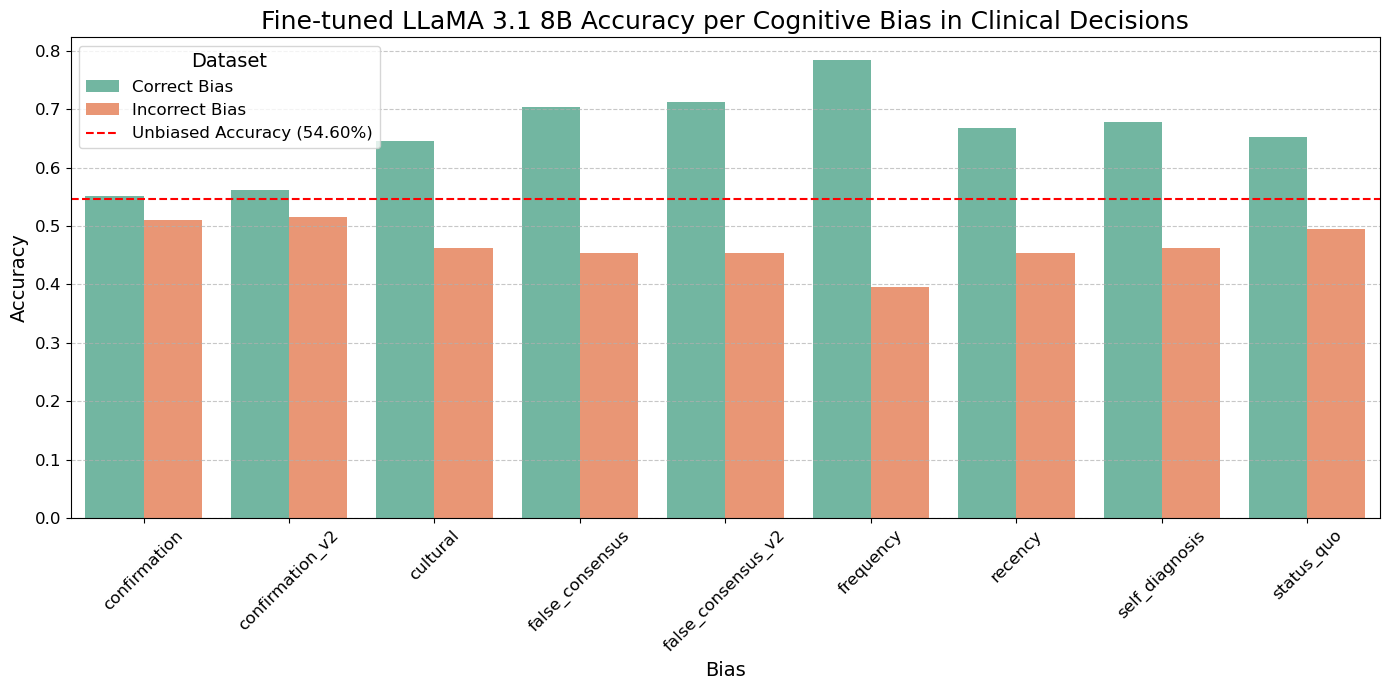

In [ ]:
#finetuned lora

import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# List of biases in order
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

# Step 1: Read in the two cogbias output JSON files into dictionaries
with open("results/incorrect_finetuned.json", "r") as f:
    cogbias_incorrect_results = json.load(f)

with open("results/correct_finetuned", "r") as f:
    cogbias_correct_results = json.load(f)

# Step 2: Assign biases cyclically to each entry in these datasets
def assign_biases_cyclically(results, biases_list):
    for i, entry in enumerate(results):
        entry['bias'] = biases_list[i % len(biases_list)]
    return results

# Assign biases to the results
cogbias_incorrect_results = assign_biases_cyclically(cogbias_incorrect_results, biases)
cogbias_correct_results = assign_biases_cyclically(cogbias_correct_results, biases)

# Step 3: Output them back to separate JSON files with biases included
with open("cogbias_incorrect_results_with_bias_finetuned_round2.json", "w") as f:
    json.dump(cogbias_incorrect_results, f, indent=4)

with open("cogbias_correct_results_with_bias_finetuned_round2.json", "w") as f:
    json.dump(cogbias_correct_results, f, indent=4)

print("Results with biases saved to 'cogbias_incorrect_results_with_bias_finetuned_round2.json' and 'cogbias_correct_results_with_bias_finetuned_round2.json'.")

# Step 4: Group by bias for each dataset separately and count correct responses
def prepare_data_for_plotting(results, dataset_name):
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Dataset': dataset_name})
    df = pd.DataFrame(data)
    return df

# Prepare data for both datasets
df_incorrect = prepare_data_for_plotting(cogbias_incorrect_results, 'Incorrect Bias')
df_correct = prepare_data_for_plotting(cogbias_correct_results, 'Correct Bias')

# Combine the dataframes
df_combined = pd.concat([df_incorrect, df_correct], ignore_index=True)

# Count the number of correct responses per bias for each dataset
accuracy_df = df_combined.groupby(['Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Calculate overall accuracy for the unbiased dataset
with open("results/unbiased_finetuned.json", "r") as f:
    cogbias_unbiased_results = json.load(f)

# Compute unbiased accuracy
unbiased_correct = sum(1 for entry in cogbias_unbiased_results if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
unbiased_total = len(cogbias_unbiased_results)
unbiased_accuracy = unbiased_correct / unbiased_total

print(f"Unbiased Dataset Accuracy: {unbiased_accuracy:.2%}")

# Step 5: Create a pretty Seaborn graph comparing the accuracies
plt.figure(figsize=(14, 7))
sns.barplot(data=accuracy_df, x='Bias', y='Accuracy', hue='Dataset', palette='Set2')
plt.axhline(y=unbiased_accuracy, color='red', linestyle='--', label=f'Unbiased Accuracy ({unbiased_accuracy:.2%})')
plt.title('Fine-tuned LLaMA 3.1 8B Accuracy per Cognitive Bias in Clinical Decisions', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bias_accuracy_comparison_with_unbiased_line_finetuned_round2.png', dpi=300)
plt.show()


Results with biases saved to 'cogbias_incorrect_results_with_bias_finetuned_round2.json' and 'cogbias_correct_results_with_bias_finetuned_round2.json'.
Unbiased Dataset Accuracy: 53.42%


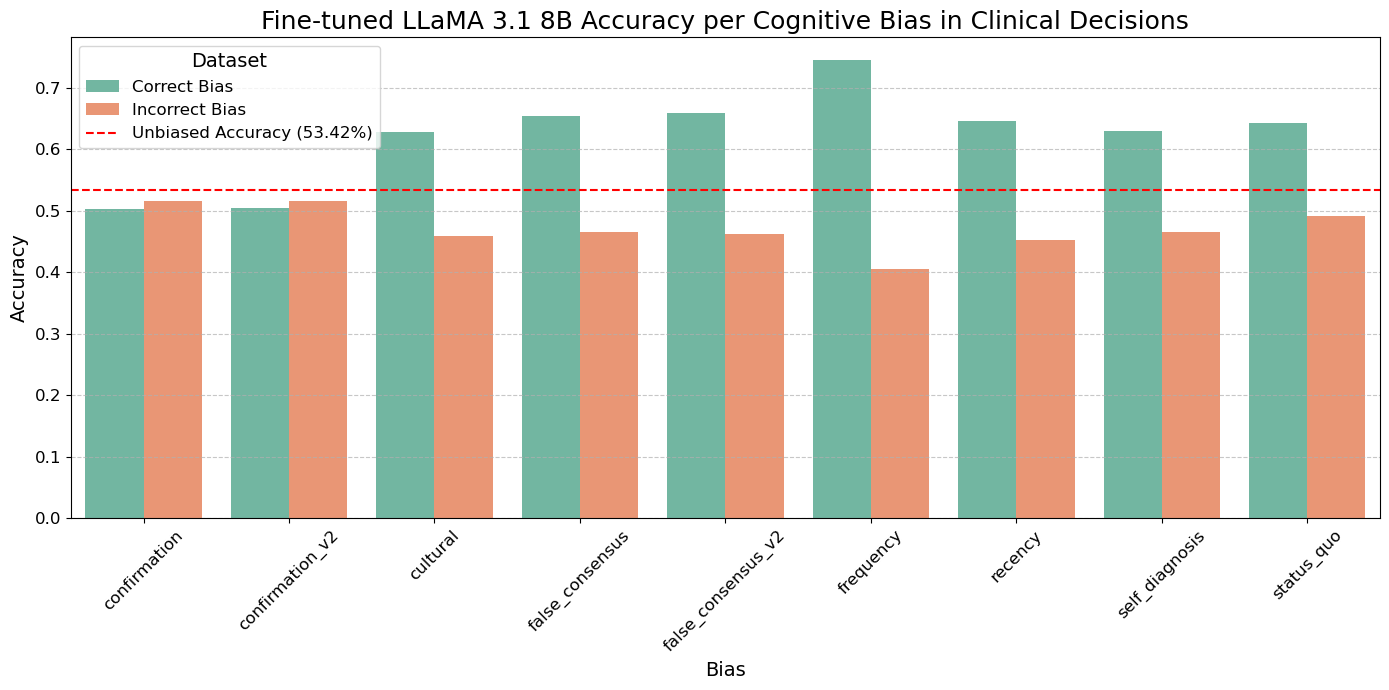

In [ ]:
#finetuned lora prompt

import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# List of biases in order
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

# Step 1: Read in the two cogbias output JSON files into dictionaries
with open("results/incorrect_finetuned_prompt", "r") as f:
    cogbias_incorrect_results = json.load(f)

with open("results/correct_finetuned_prompt", "r") as f:
    cogbias_correct_results = json.load(f)

# Step 2: Assign biases cyclically to each entry in these datasets
def assign_biases_cyclically(results, biases_list):
    for i, entry in enumerate(results):
        entry['bias'] = biases_list[i % len(biases_list)]
    return results

# Assign biases to the results
cogbias_incorrect_results = assign_biases_cyclically(cogbias_incorrect_results, biases)
cogbias_correct_results = assign_biases_cyclically(cogbias_correct_results, biases)

# Step 3: Output them back to separate JSON files with biases included
# with open("cogbias_incorrect_results_with_bias_finetuned_round2_prompt.json", "w") as f:
#     json.dump(cogbias_incorrect_results, f, indent=4)

# with open("cogbias_correct_results_with_bias_finetuned_round2_prompt.json", "w") as f:
#     json.dump(cogbias_correct_results, f, indent=4)

print("Results with biases saved to 'cogbias_incorrect_results_with_bias_finetuned_round2.json' and 'cogbias_correct_results_with_bias_finetuned_round2.json'.")

# Step 4: Group by bias for each dataset separately and count correct responses
def prepare_data_for_plotting(results, dataset_name):
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Dataset': dataset_name})
    df = pd.DataFrame(data)
    return df

# Prepare data for both datasets
df_incorrect = prepare_data_for_plotting(cogbias_incorrect_results, 'Incorrect Bias')
df_correct = prepare_data_for_plotting(cogbias_correct_results, 'Correct Bias')

# Combine the dataframes
df_combined = pd.concat([df_incorrect, df_correct], ignore_index=True)

# Count the number of correct responses per bias for each dataset
accuracy_df = df_combined.groupby(['Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Calculate overall accuracy for the unbiased dataset
with open("results/unbiased_finetuned_prompt.json", "r") as f:
    cogbias_unbiased_results = json.load(f)

# Compute unbiased accuracy
unbiased_correct = sum(1 for entry in cogbias_unbiased_results if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
unbiased_total = len(cogbias_unbiased_results)
unbiased_accuracy = unbiased_correct / unbiased_total

print(f"Unbiased Dataset Accuracy: {unbiased_accuracy:.2%}")

# Step 5: Create a pretty Seaborn graph comparing the accuracies
plt.figure(figsize=(14, 7))
sns.barplot(data=accuracy_df, x='Bias', y='Accuracy', hue='Dataset', palette='Set2')
plt.axhline(y=unbiased_accuracy, color='red', linestyle='--', label=f'Unbiased Accuracy ({unbiased_accuracy:.2%})')
plt.title('Fine-tuned LLaMA 3.1 8B Accuracy per Cognitive Bias in Clinical Decisions', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('bias_accuracy_comparison_with_unbiased_line_finetuned_round2.png', dpi=300)
plt.show()


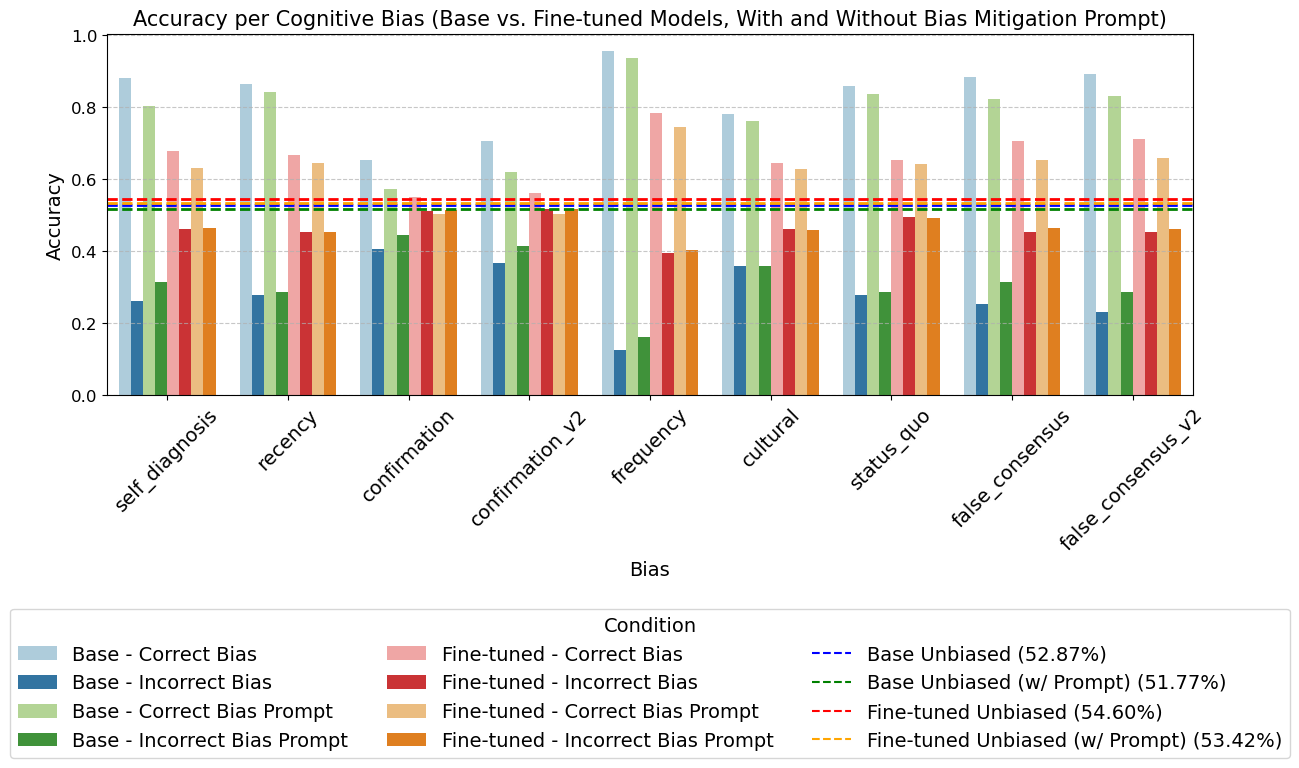

In [ ]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# List of biases in a fixed order for plotting
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

#-----------------------------
# Load All Results Files
#-----------------------------

# Original, base model, biased scenarios
with open("cogbias_incorrect_results_with_bias.json", "r") as f:
    orig_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias.json", "r") as f:
    orig_correct_results = json.load(f)

# Fine-tuned, biased scenarios
with open("cogbias_incorrect_results_with_bias_finetuned_round2.json", "r") as f:
    ft_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2.json", "r") as f:
    ft_correct_results = json.load(f)

# Original, base model, biased scenarios with prompt
with open("cogbias_incorrect_results_with_bias_prompt.json", "r") as f:
    orig_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_prompt.json", "r") as f:
    orig_correct_results_prompt = json.load(f)

# Fine-tuned, biased scenarios with prompt -- INCLUDED BUT COMMENTED OUT
with open("cogbias_incorrect_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_correct_results_prompt = json.load(f)

# Unbiased (original and fine-tuned)
with open("results/unbiased_base.json", "r") as f:
    orig_unbiased_results = json.load(f)
with open("results/unbiased_finetuned.json", "r") as f:
    ft_unbiased_results = json.load(f)

# Unbiased with prompt (original and fine-tuned)
with open("results/unbiased_base_prompt.json", "r") as f:
    orig_unbiased_results_prompt = json.load(f)
with open("results/unbiased_finetuned_prompt.json", "r") as f:
    ft_unbiased_results_prompt = json.load(f)

#-----------------------------
# Helper Function
#-----------------------------
def prepare_data_for_plotting(results, model_name, dataset_name):
    """
    results: a list of entries, each with 'correct_answer', 'response', and 'bias' fields
    model_name: 'Base' or 'Fine-tuned'
    dataset_name: Something like 'Correct Bias', 'Incorrect Bias', 'Correct Bias Prompt', etc.
    """
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Model': model_name, 'Dataset': dataset_name})
    return pd.DataFrame(data)

#-----------------------------
# Prepare DataFrames
#-----------------------------

# Without prompt
df_base_incorrect = prepare_data_for_plotting(orig_incorrect_results, "Base", "Incorrect Bias")
df_base_correct = prepare_data_for_plotting(orig_correct_results, "Base", "Correct Bias")
df_ft_incorrect = prepare_data_for_plotting(ft_incorrect_results, "Fine-tuned", "Incorrect Bias")
df_ft_correct = prepare_data_for_plotting(ft_correct_results, "Fine-tuned", "Correct Bias")

# With prompt
df_base_incorrect_prompt = prepare_data_for_plotting(orig_incorrect_results_prompt, "Base", "Incorrect Bias Prompt")
df_base_correct_prompt = prepare_data_for_plotting(orig_correct_results_prompt, "Base", "Correct Bias Prompt")

# Fine-tuned with prompt DataFrames
df_ft_incorrect_prompt = prepare_data_for_plotting(ft_incorrect_results_prompt, "Fine-tuned", "Incorrect Bias Prompt")
df_ft_correct_prompt = prepare_data_for_plotting(ft_correct_results_prompt, "Fine-tuned", "Correct Bias Prompt")

# Combine all conditions into one DataFrame
df_combined = pd.concat([
    df_base_incorrect, df_base_correct,
    df_base_incorrect_prompt, df_base_correct_prompt,
    df_ft_incorrect, df_ft_correct,
    df_ft_incorrect_prompt, df_ft_correct_prompt
], ignore_index=True)

#-----------------------------
# Compute Unbiased Accuracies
#-----------------------------

# Original unbiased
base_unbiased_correct = sum(1 for entry in orig_unbiased_results
                            if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
base_unbiased_total = len(orig_unbiased_results)
base_unbiased_accuracy = base_unbiased_correct / base_unbiased_total if base_unbiased_total > 0 else 0

ft_unbiased_correct = sum(1 for entry in ft_unbiased_results
                          if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
ft_unbiased_total = len(ft_unbiased_results)
ft_unbiased_accuracy = ft_unbiased_correct / ft_unbiased_total if ft_unbiased_total > 0 else 0

# Unbiased prompt
base_unbiased_correct_prompt = sum(1 for entry in orig_unbiased_results_prompt
                                   if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
base_unbiased_total_prompt = len(orig_unbiased_results_prompt)
base_unbiased_accuracy_prompt = base_unbiased_correct_prompt / base_unbiased_total_prompt if base_unbiased_total_prompt > 0 else 0

ft_unbiased_correct_prompt = sum(1 for entry in ft_unbiased_results_prompt
                                 if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
ft_unbiased_total_prompt = len(ft_unbiased_results_prompt)
ft_unbiased_accuracy_prompt = ft_unbiased_correct_prompt / ft_unbiased_total_prompt if ft_unbiased_total_prompt > 0 else 0

#-----------------------------
# Compute Accuracy per Bias/Model/Dataset
#-----------------------------
accuracy_df = df_combined.groupby(['Model', 'Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Create a "Condition" column that combines Model and Dataset for plotting
accuracy_df['Condition'] = accuracy_df['Model'] + " - " + accuracy_df['Dataset']

#-----------------------------
# Plotting
#-----------------------------

plt.figure(figsize=(12, 6))
# Adjust hue_order to place base conditions before fine-tuned
hue_order = [
    "Base - Correct Bias", 
    "Base - Incorrect Bias", 
    "Base - Correct Bias Prompt",
    "Base - Incorrect Bias Prompt",
    "Fine-tuned - Correct Bias", 
    "Fine-tuned - Incorrect Bias",
    "Fine-tuned - Correct Bias Prompt",
    "Fine-tuned - Incorrect Bias Prompt"
]

sns.barplot(
    data=accuracy_df, 
    x='Bias', 
    y='Accuracy', 
    hue='Condition', 
    palette='Paired', 
    order=biases, 
    hue_order=hue_order
)

plt.title('Accuracy per Cognitive Bias (Base vs. Fine-tuned Models, With and Without Bias Mitigation Prompt)', fontsize=15)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add lines for unbiased accuracies
plt.axhline(y=base_unbiased_accuracy, color='blue', linestyle='--', linewidth=2)
plt.axhline(y=ft_unbiased_accuracy, color='red', linestyle='--', linewidth=2)
plt.axhline(y=base_unbiased_accuracy_prompt, color='green', linestyle='--', linewidth=2)
plt.axhline(y=ft_unbiased_accuracy_prompt, color='orange', linestyle='--', linewidth=2)

# Create custom legend handles for the unbiased lines
line_base_unbiased = Line2D([0], [0], color='blue', linestyle='--', label=f'Base Unbiased ({base_unbiased_accuracy:.2%})')
line_ft_unbiased = Line2D([0], [0], color='red', linestyle='--', label=f'Fine-tuned Unbiased ({ft_unbiased_accuracy:.2%})')
line_base_unbiased_prompt = Line2D([0], [0], color='green', linestyle='--', label=f'Base Unbiased (w/ Prompt) ({base_unbiased_accuracy_prompt:.2%})')
line_ft_unbiased_prompt = Line2D([0], [0], color='orange', linestyle='--', label=f'Fine-tuned Unbiased (w/ Prompt) ({ft_unbiased_accuracy_prompt:.2%})')

# Get existing handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Combine the existing legend with the new lines
legend_handles = handles + [line_base_unbiased, line_base_unbiased_prompt, line_ft_unbiased, line_ft_unbiased_prompt]
legend_labels = labels + [
    f'Base Unbiased ({base_unbiased_accuracy:.2%})',
    f'Base Unbiased (w/ Prompt) ({base_unbiased_accuracy_prompt:.2%})',
    f'Fine-tuned Unbiased ({ft_unbiased_accuracy:.2%})',
    f'Fine-tuned Unbiased (w/ Prompt) ({ft_unbiased_accuracy_prompt:.2%})'
]

plt.legend(
    handles=legend_handles,
    labels=legend_labels,
    title='Condition',
    fontsize=14,
    title_fontsize=14,
    loc='lower center',  # Place legend below the plot
    ncol=3,
    bbox_to_anchor=(0.5, -1.03)  # Adjust position as needed
)


plt.savefig('all_conditions_accuracy_comparison_with_prompt.png', dpi=300, bbox_inches='tight')
plt.show()



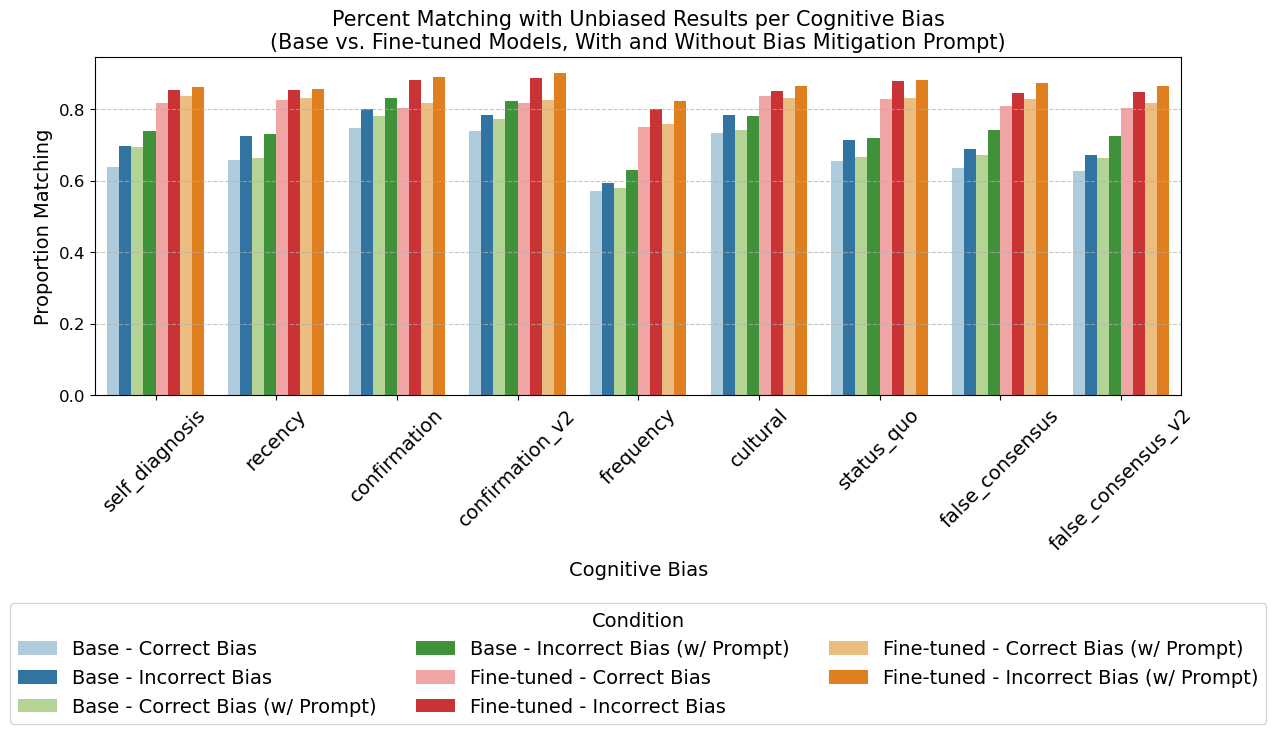

In [ ]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# List of biases in a fixed order for plotting
biases = [
    "self_diagnosis", "recency", "confirmation", "confirmation_v2",
    "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"
]

#-----------------------------
# Load All Results Files
#-----------------------------

# Original, base model, biased scenarios
with open("cogbias_incorrect_results_with_bias.json", "r") as f:
    orig_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias.json", "r") as f:
    orig_correct_results = json.load(f)

# Fine-tuned, biased scenarios
with open("cogbias_incorrect_results_with_bias_finetuned_round2.json", "r") as f:
    ft_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2.json", "r") as f:
    ft_correct_results = json.load(f)

# Original, base model, biased scenarios with prompt
with open("cogbias_incorrect_results_with_bias_prompt.json", "r") as f:
    orig_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_prompt.json", "r") as f:
    orig_correct_results_prompt = json.load(f)

# Fine-tuned, biased scenarios with prompt
with open("cogbias_incorrect_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_correct_results_prompt = json.load(f)

# Unbiased (original and fine-tuned)
with open("results/unbiased_base.json", "r") as f:
    orig_unbiased_results = json.load(f)
with open("results/unbiased_finetuned.json", "r") as f:
    ft_unbiased_results = json.load(f)

# Unbiased with prompt (original and fine-tuned)
with open("results/unbiased_base_prompt.json", "r") as f:
    orig_unbiased_results_prompt = json.load(f)
with open("results/unbiased_finetuned_prompt.json", "r") as f:
    ft_unbiased_results_prompt = json.load(f)

#-----------------------------
# Helper Functions
#-----------------------------

def prepare_biased_data(results, model_name, dataset_name):
    """
    Prepares biased data for plotting.

    Args:
        results (list): List of result entries.
        model_name (str): 'Base' or 'Fine-tuned'.
        dataset_name (str): e.g., 'Correct Bias', 'Incorrect Bias', etc.

    Returns:
        pd.DataFrame: DataFrame with Bias, Is Correct, Model, Dataset.
    """
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({
            'Bias': bias,
            'Is Correct': is_correct,
            'Model': model_name,
            'Dataset': dataset_name
        })
    return pd.DataFrame(data)

def prepare_unbiased_data(unbiased_results, model_name, dataset_name):
    """
    Prepares unbiased data for merging.

    Args:
        unbiased_results (list): List of unbiased result entries.
        model_name (str): 'Base' or 'Fine-tuned'.
        dataset_name (str): e.g., 'Correct Bias', 'Incorrect Bias', etc.

    Returns:
        pd.DataFrame: DataFrame with Model, Dataset, Is Correct.
    """
    data = []
    for entry in unbiased_results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        is_correct = (correct_answer == response)
        data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'Unbiased_Is_Correct': is_correct
        })
    return pd.DataFrame(data)

#-----------------------------
# Prepare Biased DataFrames
#-----------------------------

# Without prompt
df_base_incorrect = prepare_biased_data(orig_incorrect_results, "Base", "Incorrect Bias")
df_base_correct = prepare_biased_data(orig_correct_results, "Base", "Correct Bias")
df_ft_incorrect = prepare_biased_data(ft_incorrect_results, "Fine-tuned", "Incorrect Bias")
df_ft_correct = prepare_biased_data(ft_correct_results, "Fine-tuned", "Correct Bias")

# With prompt
df_base_incorrect_prompt = prepare_biased_data(orig_incorrect_results_prompt, "Base", "Incorrect Bias (w/ Prompt)")
df_base_correct_prompt = prepare_biased_data(orig_correct_results_prompt, "Base", "Correct Bias (w/ Prompt)")
df_ft_incorrect_prompt = prepare_biased_data(ft_incorrect_results_prompt, "Fine-tuned", "Incorrect Bias (w/ Prompt)")
df_ft_correct_prompt = prepare_biased_data(ft_correct_results_prompt, "Fine-tuned", "Correct Bias (w/ Prompt)")

# Combine all biased data into one DataFrame
df_combined = pd.concat([
    df_base_incorrect, df_base_correct,
    df_base_incorrect_prompt, df_base_correct_prompt,
    df_ft_incorrect, df_ft_correct,
    df_ft_incorrect_prompt, df_ft_correct_prompt
], ignore_index=True)

# Assign QuestionID based on the order within each Model and Dataset
# This assumes that the order of biased entries corresponds to the order of unbiased entries
df_combined['QuestionID'] = df_combined.groupby(['Model', 'Dataset']).cumcount()

#-----------------------------
# Prepare Unbiased DataFrames
#-----------------------------

# Original unbiased
df_unbiased_orig = prepare_unbiased_data(orig_unbiased_results, "Base", "Incorrect Bias")
# Note: Adjust 'Dataset' to match how biased data is labeled
df_unbiased_orig_correct = prepare_unbiased_data(orig_unbiased_results, "Base", "Correct Bias")

# Fine-tuned unbiased
df_unbiased_ft = prepare_unbiased_data(ft_unbiased_results, "Fine-tuned", "Incorrect Bias")
df_unbiased_ft_correct = prepare_unbiased_data(ft_unbiased_results, "Fine-tuned", "Correct Bias")

# Original unbiased with prompt
df_unbiased_orig_prompt = prepare_unbiased_data(orig_unbiased_results_prompt, "Base", "Incorrect Bias (w/ Prompt)")
df_unbiased_orig_correct_prompt = prepare_unbiased_data(orig_unbiased_results_prompt, "Base", "Correct Bias (w/ Prompt)")

# Fine-tuned unbiased with prompt
df_unbiased_ft_prompt = prepare_unbiased_data(ft_unbiased_results_prompt, "Fine-tuned", "Incorrect Bias (w/ Prompt)")
df_unbiased_ft_correct_prompt = prepare_unbiased_data(ft_unbiased_results_prompt, "Fine-tuned", "Correct Bias (w/ Prompt)")

# Combine all unbiased data into one DataFrame
df_unbiased_combined = pd.concat([
    df_unbiased_orig, df_unbiased_orig_correct,
    df_unbiased_orig_prompt, df_unbiased_orig_correct_prompt,
    df_unbiased_ft, df_unbiased_ft_correct,
    df_unbiased_ft_prompt, df_unbiased_ft_correct_prompt
], ignore_index=True)

# Assign QuestionID based on the order within each Model and Dataset
df_unbiased_combined['QuestionID'] = df_unbiased_combined.groupby(['Model', 'Dataset']).cumcount()

#-----------------------------
# Repeat Unbiased Data 9 Times (for each bias)
#-----------------------------

# Since there are 9 biases, each unbiased entry needs to be repeated 9 times to match the biased entries
df_unbiased_repeated = df_unbiased_combined.loc[df_unbiased_combined.index.repeat(9)].reset_index(drop=True)

#-----------------------------
# Merge Biased and Unbiased Data
#-----------------------------

# Ensure that both DataFrames have the same number of rows after repetition
assert len(df_combined) == len(df_unbiased_repeated), "Mismatch in the number of rows between biased and unbiased data."

# Merge the biased data with the repeated unbiased data based on Model, Dataset, and QuestionID
df_merged = pd.concat([df_combined, df_unbiased_repeated[['Unbiased_Is_Correct']]], axis=1)

#-----------------------------
# Calculate Percent Matching
#-----------------------------

# Create a column that indicates if the biased entry matches the unbiased correctness
df_merged['Is_Matching'] = df_merged['Is Correct'] == df_merged['Unbiased_Is_Correct']

# Group by Model, Dataset, and Bias to calculate the percent matching
accuracy_df = df_merged.groupby(['Model', 'Dataset', 'Bias'])['Is_Matching'].mean().reset_index()
accuracy_df.rename(columns={'Is_Matching': 'Percent_Matching'}, inplace=True)

# Create a "Condition" column that combines Model and Dataset for plotting
accuracy_df['Condition'] = accuracy_df['Model'] + " - " + accuracy_df['Dataset']

#-----------------------------
# Plotting
#-----------------------------

plt.figure(figsize=(12, 6))

# Define the order of hue for consistency
hue_order = [
    "Base - Correct Bias", 
    "Base - Incorrect Bias", 
    "Base - Correct Bias (w/ Prompt)",
    "Base - Incorrect Bias (w/ Prompt)",
    "Fine-tuned - Correct Bias", 
    "Fine-tuned - Incorrect Bias",
    "Fine-tuned - Correct Bias (w/ Prompt)",
    "Fine-tuned - Incorrect Bias (w/ Prompt)"
]

sns.barplot(
    data=accuracy_df, 
    x='Bias', 
    y='Percent_Matching', 
    hue='Condition', 
    palette='Paired', 
    order=biases, 
    hue_order=hue_order
)

plt.title('Percent Matching with Unbiased Results per Cognitive Bias\n(Base vs. Fine-tuned Models, With and Without Bias Mitigation Prompt)', fontsize=15)
plt.xlabel('Cognitive Bias', fontsize=14)
plt.ylabel('Proportion Matching', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Update the legend
plt.legend(
    title='Condition', 
    fontsize=14, 
    title_fontsize=14,
    ncol=3,
    loc='lower center',  # Place legend below the plot
    bbox_to_anchor=(0.5, -1)  # Adjust position as needed
)

# Save the plot
plt.savefig('all_conditions_percent_matching_comparison_with_prompt.png', dpi=300, bbox_inches='tight')
plt.show()


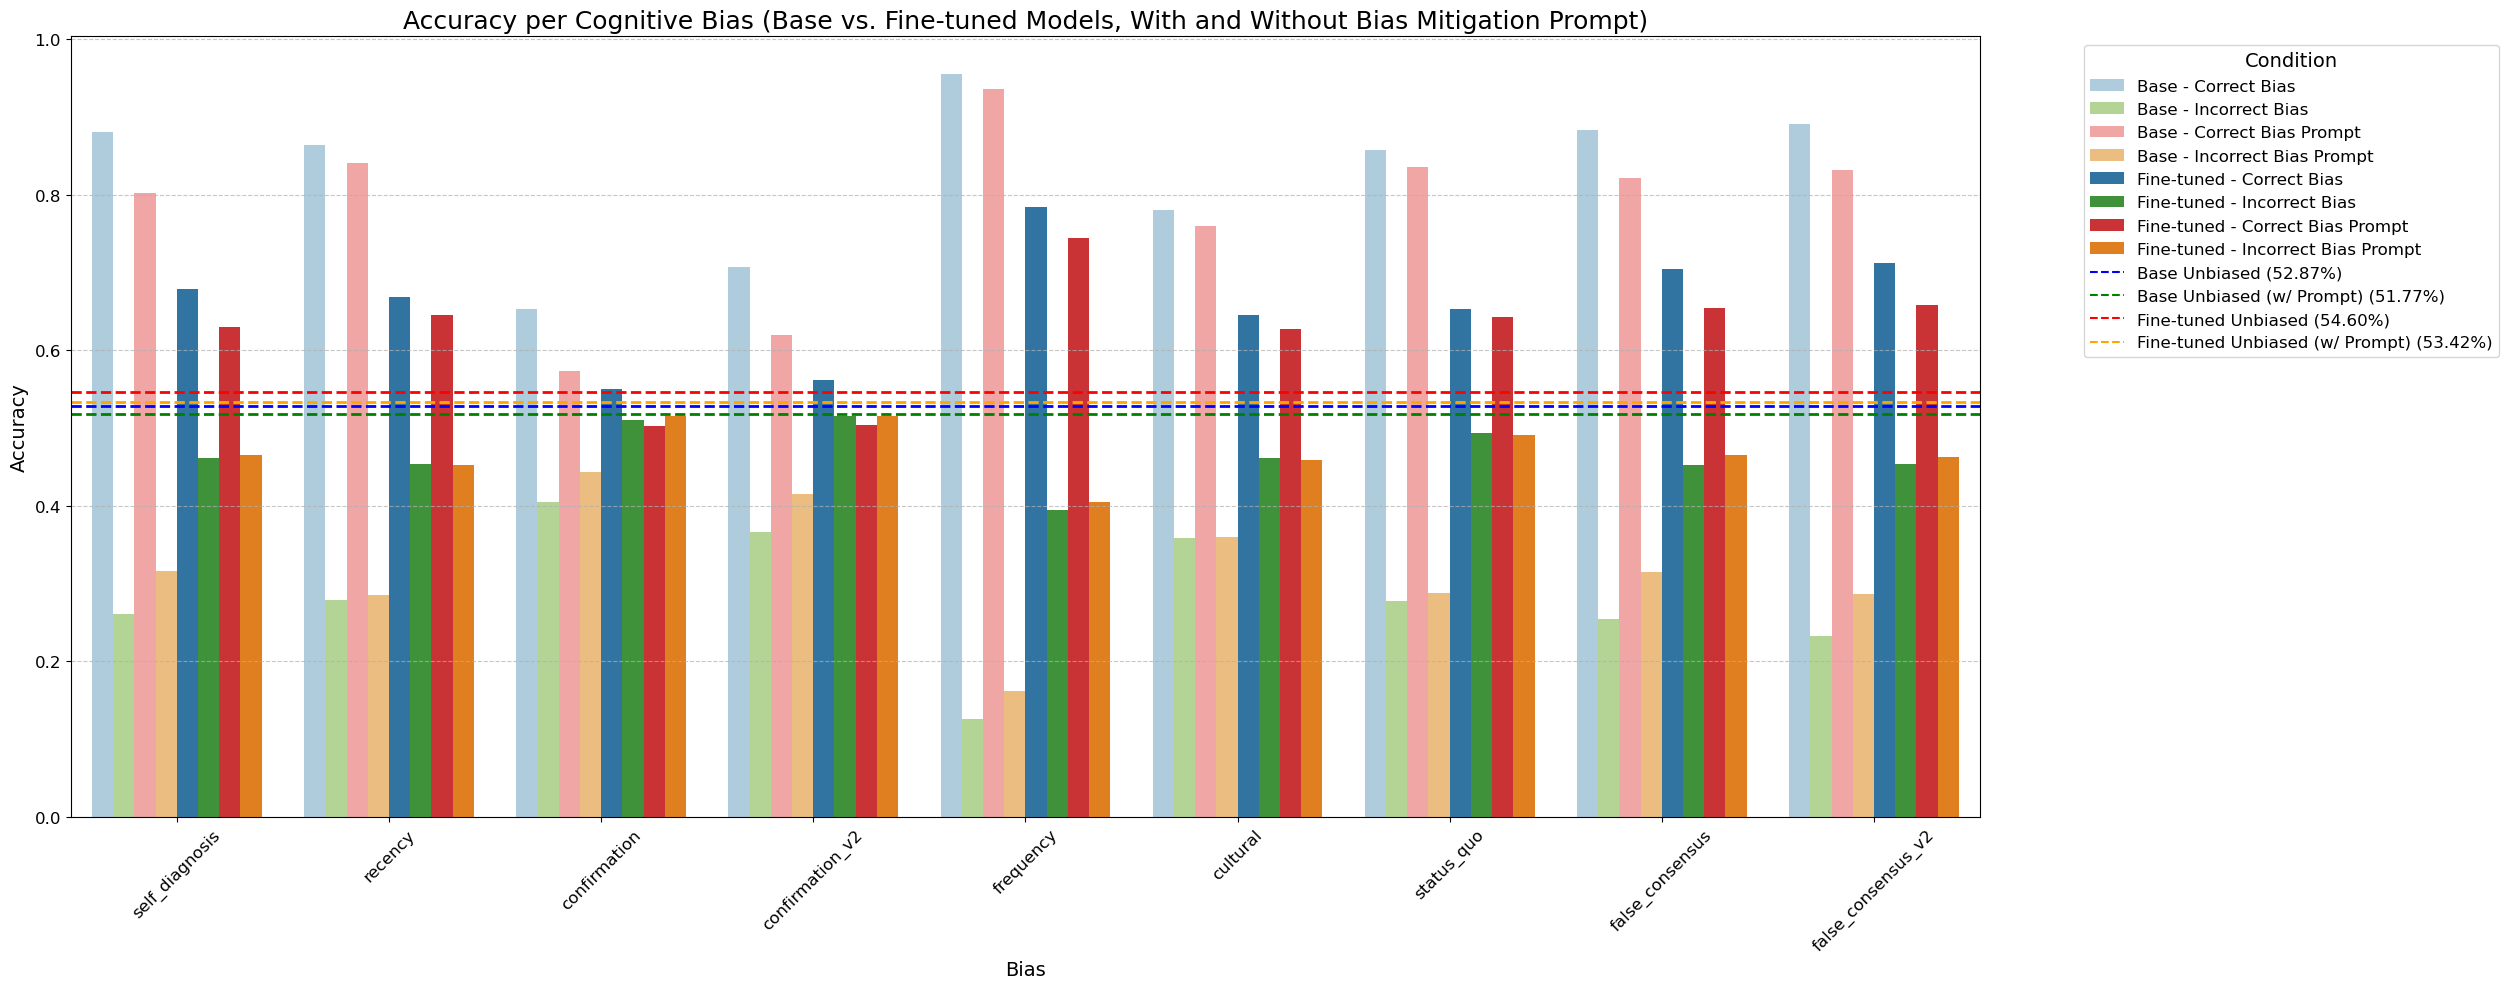

In [ ]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# List of biases in a fixed order for plotting
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

#-----------------------------
# Load All Results Files
#-----------------------------

# Original, base model, biased scenarios
with open("cogbias_incorrect_results_with_bias.json", "r") as f:
    orig_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias.json", "r") as f:
    orig_correct_results = json.load(f)

# Fine-tuned, biased scenarios
with open("cogbias_incorrect_results_with_bias_finetuned_round2.json", "r") as f:
    ft_incorrect_results = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2.json", "r") as f:
    ft_correct_results = json.load(f)

# Original, base model, biased scenarios with prompt
with open("cogbias_incorrect_results_with_bias_prompt.json", "r") as f:
    orig_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_prompt.json", "r") as f:
    orig_correct_results_prompt = json.load(f)

# Fine-tuned, biased scenarios with prompt -- INCLUDED BUT COMMENTED OUT
with open("cogbias_incorrect_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_incorrect_results_prompt = json.load(f)
with open("cogbias_correct_results_with_bias_finetuned_round2_prompt.json", "r") as f:
    ft_correct_results_prompt = json.load(f)

# Unbiased (original and fine-tuned)
with open("results/unbiased_base.json", "r") as f:
    orig_unbiased_results = json.load(f)
with open("results/unbiased_finetuned.json", "r") as f:
    ft_unbiased_results = json.load(f)

# Unbiased with prompt (original and fine-tuned)
with open("results/unbiased_base_prompt.json", "r") as f:
    orig_unbiased_results_prompt = json.load(f)
with open("results/unbiased_finetuned_prompt.json", "r") as f:
    ft_unbiased_results_prompt = json.load(f)
#-----------------------------
# Helper Function
#-----------------------------
def prepare_data_for_plotting(results, model_name, dataset_name):
    """
    results: a list of entries, each with 'correct_answer', 'response', and 'bias' fields
    model_name: 'Base' or 'Fine-tuned'
    dataset_name: Something like 'Correct Bias', 'Incorrect Bias', 'Correct Bias Prompt', etc.
    """
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Model': model_name, 'Dataset': dataset_name})
    return pd.DataFrame(data)

#-----------------------------
# Prepare DataFrames
#-----------------------------

# Without prompt
df_base_incorrect = prepare_data_for_plotting(orig_incorrect_results, "Base", "Incorrect Bias")
df_base_correct = prepare_data_for_plotting(orig_correct_results, "Base", "Correct Bias")
df_ft_incorrect = prepare_data_for_plotting(ft_incorrect_results, "Fine-tuned", "Incorrect Bias")
df_ft_correct = prepare_data_for_plotting(ft_correct_results, "Fine-tuned", "Correct Bias")

# With prompt
df_base_incorrect_prompt = prepare_data_for_plotting(orig_incorrect_results_prompt, "Base", "Incorrect Bias Prompt")
df_base_correct_prompt = prepare_data_for_plotting(orig_correct_results_prompt, "Base", "Correct Bias Prompt")

# Fine-tuned with prompt DataFrames
df_ft_incorrect_prompt = prepare_data_for_plotting(ft_incorrect_results_prompt, "Fine-tuned", "Incorrect Bias Prompt")
df_ft_correct_prompt = prepare_data_for_plotting(ft_correct_results_prompt, "Fine-tuned", "Correct Bias Prompt")

# Combine all conditions into one DataFrame
df_combined = pd.concat([
    df_base_incorrect, df_base_correct,
    df_base_incorrect_prompt, df_base_correct_prompt,
    df_ft_incorrect, df_ft_correct,
    df_ft_incorrect_prompt, df_ft_correct_prompt
], ignore_index=True)

#-----------------------------
# Compute Unbiased Accuracies
#-----------------------------

# Original unbiased
base_unbiased_correct = sum(1 for entry in orig_unbiased_results
                            if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
base_unbiased_total = len(orig_unbiased_results)
base_unbiased_accuracy = base_unbiased_correct / base_unbiased_total if base_unbiased_total > 0 else 0

ft_unbiased_correct = sum(1 for entry in ft_unbiased_results
                          if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
ft_unbiased_total = len(ft_unbiased_results)
ft_unbiased_accuracy = ft_unbiased_correct / ft_unbiased_total if ft_unbiased_total > 0 else 0

# Unbiased prompt
base_unbiased_correct_prompt = sum(1 for entry in orig_unbiased_results_prompt
                                   if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
base_unbiased_total_prompt = len(orig_unbiased_results_prompt)
base_unbiased_accuracy_prompt = base_unbiased_correct_prompt / base_unbiased_total_prompt if base_unbiased_total_prompt > 0 else 0

ft_unbiased_correct_prompt = sum(1 for entry in ft_unbiased_results_prompt
                                 if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
ft_unbiased_total_prompt = len(ft_unbiased_results_prompt)
ft_unbiased_accuracy_prompt = ft_unbiased_correct_prompt / ft_unbiased_total_prompt if ft_unbiased_total_prompt > 0 else 0

#-----------------------------
# Compute Accuracy per Bias/Model/Dataset
#-----------------------------
accuracy_df = df_combined.groupby(['Model', 'Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Create a "Condition" column that combines Model and Dataset for plotting
accuracy_df['Condition'] = accuracy_df['Model'] + " - " + accuracy_df['Dataset']

#-----------------------------
# Define Custom Palette
#-----------------------------
# custom_palette = [
#     '#ADD8E6',  # Base - Correct Bias: Light Blue
#     '#F08080',  # Base - Incorrect Bias: Light Coral
#     '#90EE90',  # Base - Correct Bias Prompt: Light Green
#     '#FFD700',  # Base - Incorrect Bias Prompt: Gold
#     '#00008B',  # Fine-tuned - Correct Bias: Dark Blue
#     '#8B0000',  # Fine-tuned - Incorrect Bias: Dark Red
#     '#006400',  # Fine-tuned - Correct Bias Prompt: Dark Green
#     '#FF8C00'   # Fine-tuned - Incorrect Bias Prompt: Dark Orange
# ]

paired_palette = sns.color_palette("Paired", 8)

# Define the custom_palette with the first 8 colors
custom_palette = [
    paired_palette[0],  # Base - Correct Bias: #a6cee3
    paired_palette[2],  # Fine-tuned - Correct Bias: #1f78b4
    paired_palette[4],  # Base - Incorrect Bias: #b2df8a
    paired_palette[6],  # Fine-tuned - Incorrect Bias: #33a02c
    paired_palette[1],  # Base - Correct Bias Prompt: #fb9a99
    paired_palette[3],  # Fine-tuned - Correct Bias Prompt: #e31a1c
    paired_palette[5],  # Base - Incorrect Bias Prompt: #fdbf6f
    paired_palette[7]   # Fine-tuned - Incorrect Bias Prompt: #ff7f00
]

#-----------------------------
# Plotting
#-----------------------------

plt.figure(figsize=(20, 10))

# Adjust hue_order to place base conditions before fine-tuned
hue_order = [
    "Base - Correct Bias", 
    "Base - Incorrect Bias", 
    "Base - Correct Bias Prompt",
    "Base - Incorrect Bias Prompt",
    "Fine-tuned - Correct Bias", 
    "Fine-tuned - Incorrect Bias",
    "Fine-tuned - Correct Bias Prompt",
    "Fine-tuned - Incorrect Bias Prompt"
]

sns.barplot(
    data=accuracy_df, 
    x='Bias', 
    y='Accuracy', 
    hue='Condition', 
    palette=custom_palette,  # Use the custom palette here
    order=biases, 
    hue_order=hue_order
)

plt.title('Accuracy per Cognitive Bias (Base vs. Fine-tuned Models, With and Without Bias Mitigation Prompt)', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add lines for unbiased accuracies
plt.axhline(y=base_unbiased_accuracy, color='blue', linestyle='--', linewidth=2)
plt.axhline(y=ft_unbiased_accuracy, color='red', linestyle='--', linewidth=2)
plt.axhline(y=base_unbiased_accuracy_prompt, color='green', linestyle='--', linewidth=2)
plt.axhline(y=ft_unbiased_accuracy_prompt, color='orange', linestyle='--', linewidth=2)

# Create custom legend handles for the unbiased lines
line_base_unbiased = Line2D([0], [0], color='blue', linestyle='--', label=f'Base Unbiased ({base_unbiased_accuracy:.2%})')
line_ft_unbiased = Line2D([0], [0], color='red', linestyle='--', label=f'Fine-tuned Unbiased ({ft_unbiased_accuracy:.2%})')
line_base_unbiased_prompt = Line2D([0], [0], color='green', linestyle='--', label=f'Base Unbiased (w/ Prompt) ({base_unbiased_accuracy_prompt:.2%})')
line_ft_unbiased_prompt = Line2D([0], [0], color='orange', linestyle='--', label=f'Fine-tuned Unbiased (w/ Prompt) ({ft_unbiased_accuracy_prompt:.2%})')

# Get existing handles and labels from the plot
handles, labels = plt.gca().get_legend_handles_labels()

# Combine the existing legend with the new lines
legend_handles = handles + [line_base_unbiased, line_base_unbiased_prompt, line_ft_unbiased, line_ft_unbiased_prompt]
legend_labels = labels + [
    f'Base Unbiased ({base_unbiased_accuracy:.2%})',
    f'Base Unbiased (w/ Prompt) ({base_unbiased_accuracy_prompt:.2%})',
    f'Fine-tuned Unbiased ({ft_unbiased_accuracy:.2%})',
    f'Fine-tuned Unbiased (w/ Prompt) ({ft_unbiased_accuracy_prompt:.2%})'
]

plt.legend(
    handles=legend_handles,
    labels=legend_labels,
    title='Condition', 
    fontsize=12, 
    title_fontsize=14,
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.savefig('all_conditions_accuracy_comparison_with_prompt_reordered.png', dpi=300, bbox_inches='tight')
plt.show()


                   Dataset       Model Bias Mitigation  Correct  Total  \
0                     JAMA        Base              No      761   1524   
1   Cogbias Incorrect Bias        Base              No     3261  11457   
2     Cogbias Correct Bias        Base              No     9514  11457   
3         Cogbias Unbiased        Base              No      673   1273   
4                     JAMA        Base             Yes      762   1524   
5   Cogbias Incorrect Bias        Base             Yes     3657  11457   
6     Cogbias Correct Bias        Base             Yes     8941  11457   
7         Cogbias Unbiased        Base             Yes      659   1273   
8                     JAMA  Fine-tuned              No      796   1524   
9   Cogbias Incorrect Bias  Fine-tuned              No     5348  11457   
10    Cogbias Correct Bias  Fine-tuned              No     7586  11457   
11        Cogbias Unbiased  Fine-tuned              No      695   1273   
12                    JAMA  Fine-tuned

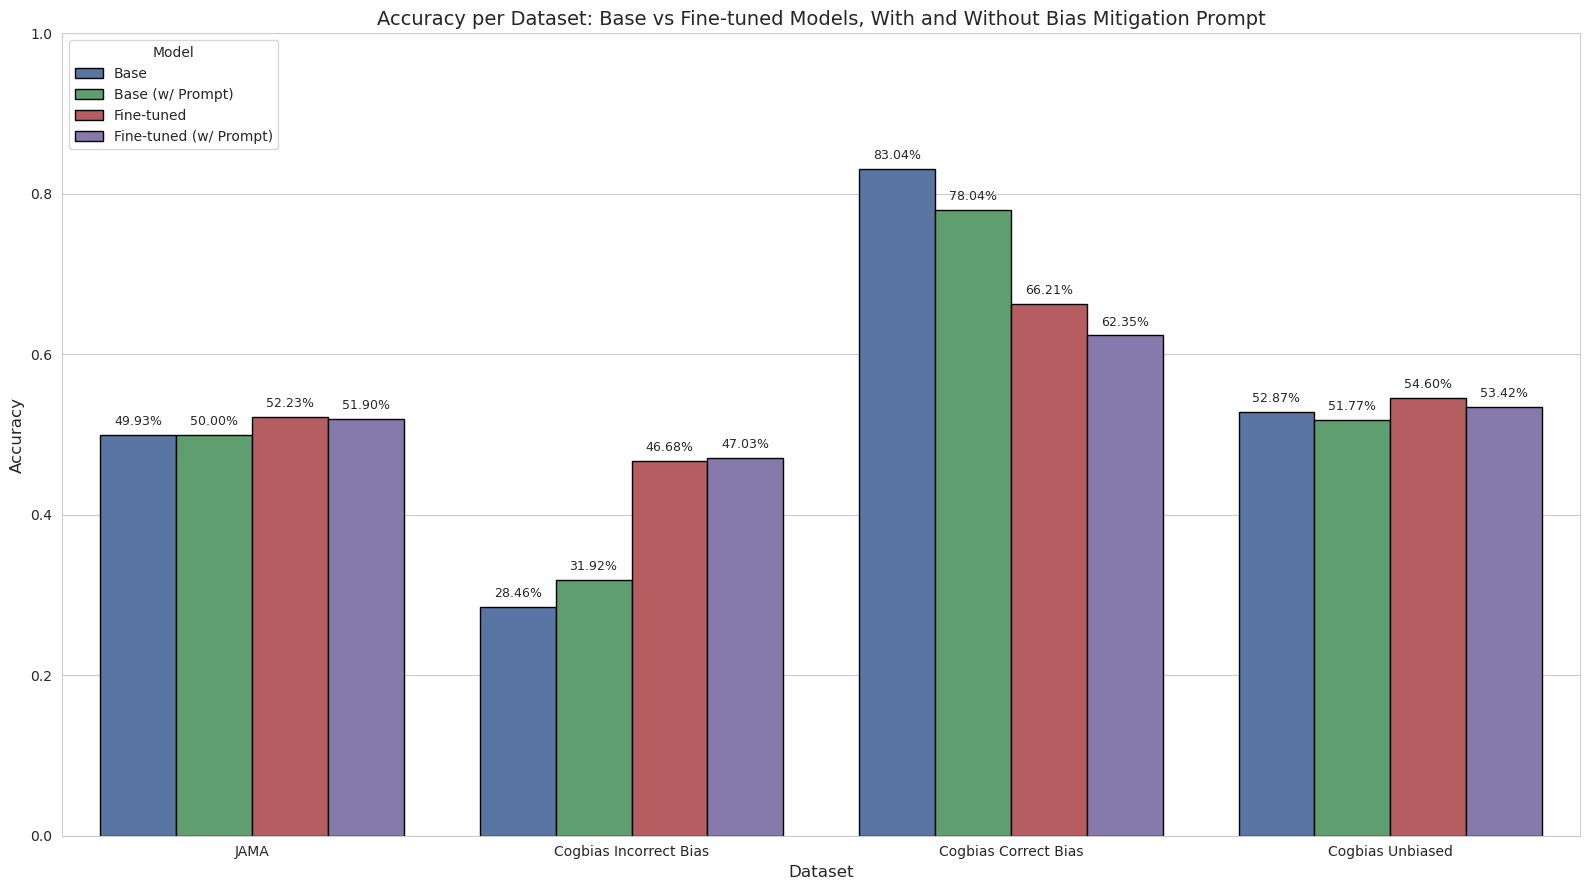

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated Data with Bias Mitigation
data = {
  'Dataset': [
      'JAMA',
      'JAMA',
      'JAMA',
      'JAMA',
  ],
  'Model': [
      'Base',
      'Base',
      'Fine-tuned',
      'Fine-tuned'
  ],
  'Bias Mitigation': [
      'No',
      'Yes',
      'No',
      'Yes'
  ],
  'Correct': [
      761, 762, 796, 791,  # Base without bias mitigation
      # Base with bias mitigation
      # Fine-tuned without bias mitigation
      # Fine-tuned with bias mitigation
  ],
  'Total': [
      1524, 1524, 1524, 1524,  # Base without bias mitigation
      # Base with bias mitigation
      # Fine-tuned without bias mitigation
      # Fine-tuned with bias mitigation
  ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute Accuracy
df['Accuracy'] = df['Correct'] / df['Total']

# Combine 'Model' and 'Bias Mitigation' for clearer legend labels
df['Model + Bias Mitigation'] = df.apply(
  lambda row: f"{row['Model']} {'(w/ Prompt)' if row['Bias Mitigation'] == 'Yes' else ''}",
  axis=1
)

# Clean up any extra spaces
df['Model + Bias Mitigation'] = df['Model + Bias Mitigation'].str.strip()

# Display the DataFrame (Optional)
# print(df)

# Set Seaborn Style
sns.set_style("darkgrid")  # Use darkgrid style

# Initialize the Figure
plt.figure(figsize=(10, 6))

# Create the Bar Plot
ax = sns.barplot(
  x='Dataset',
  y='Accuracy',
  hue='Model + Bias Mitigation',
  data=df[df['Dataset'] == 'JAMA'],  # Filter data for JAMA only
  palette='Set2',  # Use built-in color palette 'Set2'
  edgecolor='black'
)

# Add Accuracy Labels on Top of Bars
for bar in ax.patches:
  height = bar.get_height()
  if height > 0:
    ax.annotate(
      f'{height:.2%}',
      xy=(bar.get_x() + bar.get_width() / 2, height),
      xytext=(0, 5),  # 5 points vertical offset
      textcoords="offset points",
      ha='center',
      va='bottom',
      fontsize=9
    )

# Customize X-axis Labels
plt.xticks(rotation=0, ha='center')

# Set Labels and Title
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy for JAMA Dataset: Base vs Fine-tuned Models', fontsize=14)

# Set Y-axis Limits
plt.ylim(0, 1)

# Customize Legend
plt.legend(title='Model', loc='upper left')

# Optimize Layout
plt.tight_layout()

# Save the Plot as PNG (Optional)
# plt.savefig('model_comparison_jama.png', dpi=300)

# Display the Plot
plt.show()

/tmp/ipykernel_25383/1024812446.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


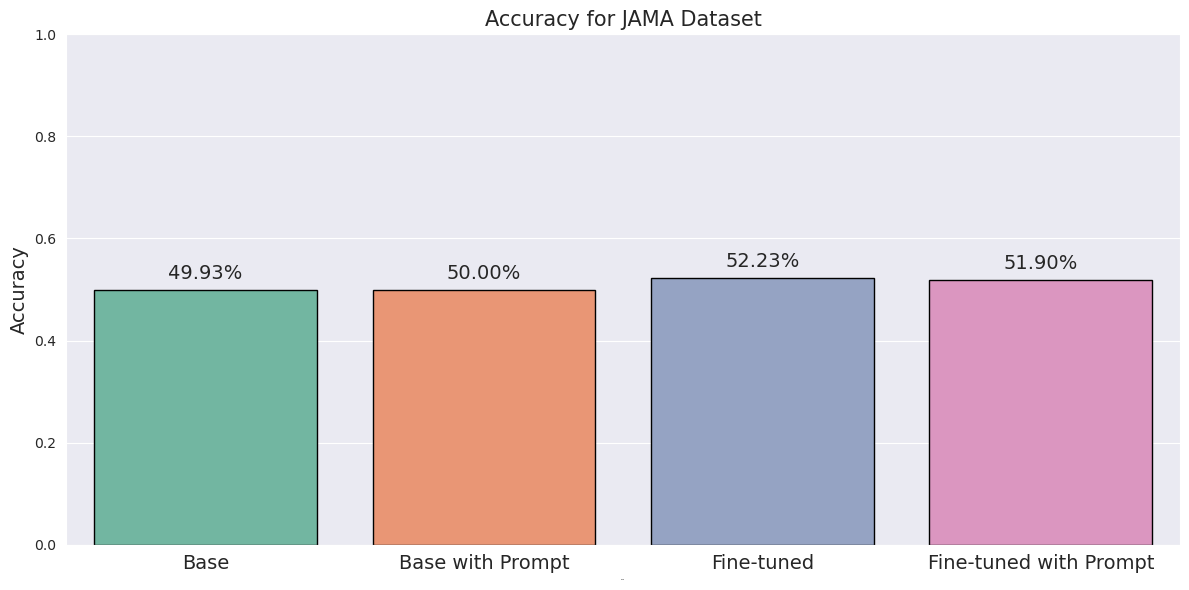

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for JAMA
jama_data = [
    ("Base", 761 / 1524),
    ("Base with Prompt", 762 / 1524),
    ("Fine-tuned", 796 / 1524),
    ("Fine-tuned with Prompt", 791 / 1524)
]

# Create a DataFrame
df = pd.DataFrame(jama_data, columns=["Model", "Accuracy"])

# Set Seaborn Style
sns.set_style("darkgrid")

# Initialize the Figure
plt.figure(figsize=(12, 6))

# Create the Bar Plot
ax = sns.barplot(
    x="Model",
    y="Accuracy",
    data=df,
    palette="Set2",
    edgecolor="black"
)

# Add Accuracy Labels on Top of Bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height:.2%}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # 5 points vertical offset
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=14
    )

# Customize X-axis Labels
plt.xticks(rotation=0, ha='center', fontsize=14)

# Set Labels and Title
plt.xlabel("Model", fontsize=0)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy for JAMA Dataset", fontsize=15)

# Set Y-axis Limits
plt.ylim(0, 1)

# Optimize Layout
plt.tight_layout()

plt.savefig('model_comparison_jama.png', dpi=300)


# Display the Plot
plt.show()

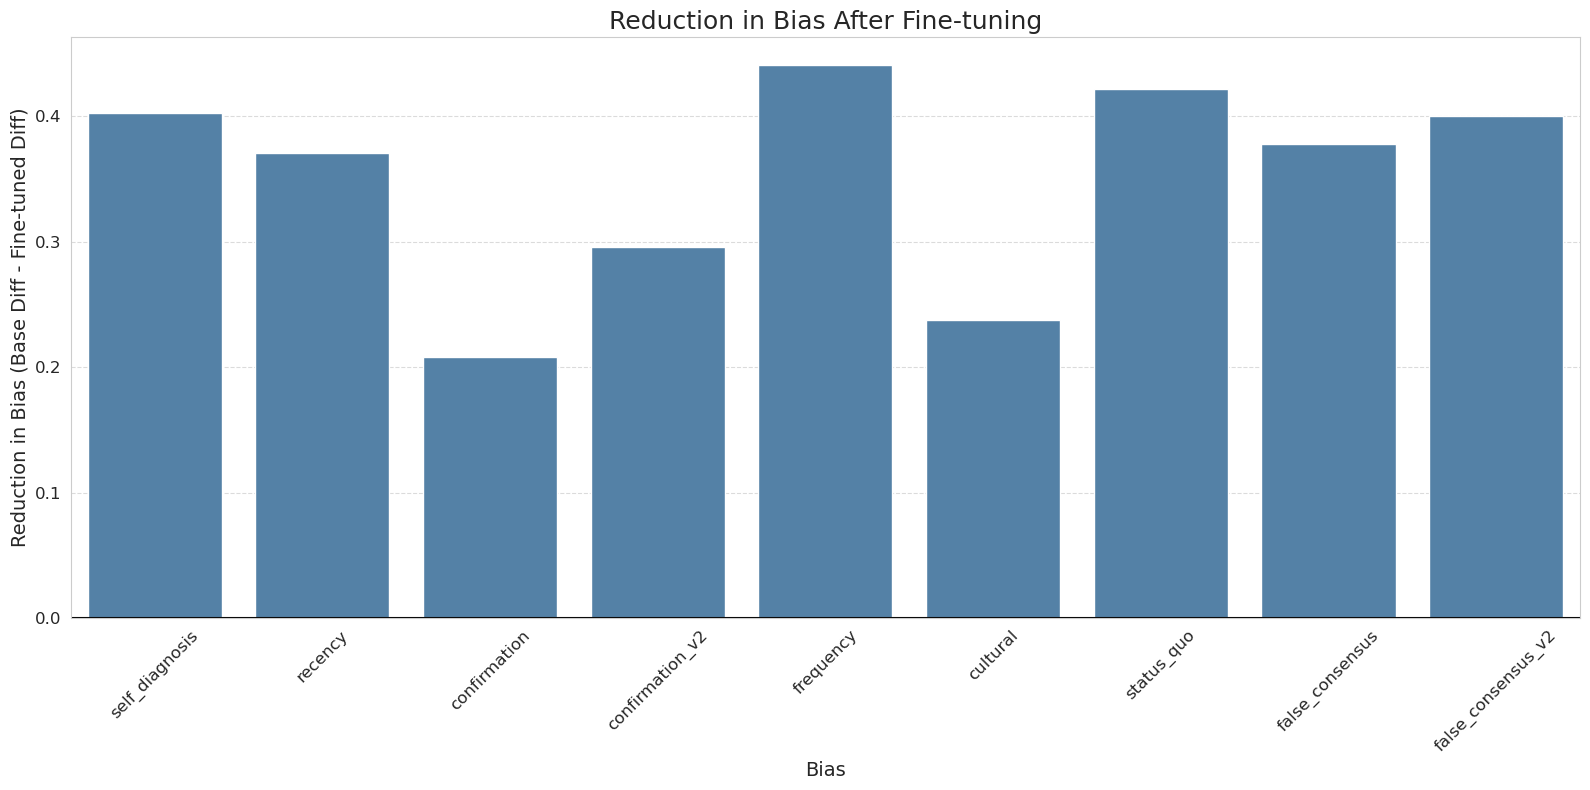

In [ ]:
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# List of biases in order
biases = ["self_diagnosis", "recency", "confirmation", "confirmation_v2",
          "frequency", "cultural", "status_quo", "false_consensus", "false_consensus_v2"]

# Read in all four results files with biases included
with open("cogbias_incorrect_results_with_bias.json", "r") as f:
    orig_incorrect_results = json.load(f)

with open("cogbias_correct_results_with_bias.json", "r") as f:
    orig_correct_results = json.load(f)

with open("cogbias_incorrect_results_with_bias_finetuned_round2.json", "r") as f:
    ft_incorrect_results = json.load(f)

with open("cogbias_correct_results_with_bias_finetuned_round2.json", "r") as f:
    ft_correct_results = json.load(f)

# Read in unbiased results for both base and fine-tuned
with open("results/unbiased_base.json", "r") as f:
    orig_unbiased_results = json.load(f)

with open("results/unbiased_finetuned.json", "r") as f:
    ft_unbiased_results = json.load(f)

def prepare_data_for_plotting(results, model_name, dataset_name):
    """
    results: a list of entries, each with 'correct_answer', 'response', and 'bias' fields
    model_name: 'Base' or 'Fine-tuned'
    dataset_name: 'Correct Bias' or 'Incorrect Bias'
    """
    data = []
    for entry in results:
        correct_answer = entry.get('correct_answer', '').strip()
        response = entry.get('response', '').strip()
        bias = entry.get('bias', 'unknown')
        is_correct = (correct_answer == response)
        data.append({'Bias': bias, 'Is Correct': is_correct, 'Model': model_name, 'Dataset': dataset_name})
    return pd.DataFrame(data)

# Prepare dataframes for each condition
df_base_incorrect = prepare_data_for_plotting(orig_incorrect_results, "Base", "Incorrect Bias")
df_base_correct = prepare_data_for_plotting(orig_correct_results, "Base", "Correct Bias")
df_ft_incorrect = prepare_data_for_plotting(ft_incorrect_results, "Fine-tuned", "Incorrect Bias")
df_ft_correct = prepare_data_for_plotting(ft_correct_results, "Fine-tuned", "Correct Bias")

# Combine all into one DataFrame
df_combined = pd.concat([df_base_incorrect, df_base_correct, df_ft_incorrect, df_ft_correct], ignore_index=True)

# Compute unbiased accuracy for base and fine-tuned
base_unbiased_correct = sum(1 for entry in orig_unbiased_results 
                            if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
base_unbiased_total = len(orig_unbiased_results)
base_unbiased_accuracy = base_unbiased_correct / base_unbiased_total if base_unbiased_total > 0 else 0

ft_unbiased_correct = sum(1 for entry in ft_unbiased_results 
                          if entry.get('correct_answer', '').strip() == entry.get('response', '').strip())
ft_unbiased_total = len(ft_unbiased_results)
ft_unbiased_accuracy = ft_unbiased_correct / ft_unbiased_total if ft_unbiased_total > 0 else 0

# Compute accuracy per Bias, per Model, per Dataset (Correct/Incorrect)
accuracy_df = df_combined.groupby(['Model', 'Dataset', 'Bias'])['Is Correct'].mean().reset_index(name='Accuracy')

# Pivot the data so we get columns for correct and incorrect conditions per model
pivot_df = accuracy_df.pivot_table(index=['Model', 'Bias'], columns='Dataset', values='Accuracy').reset_index()

# Ensure both "Correct Bias" and "Incorrect Bias" columns exist, filling missing with 0 if needed
pivot_df['Correct Bias'] = pivot_df.get('Correct Bias', 0)
pivot_df['Incorrect Bias'] = pivot_df.get('Incorrect Bias', 0)

# Compute difference between incorrect and correct for each model/bias
pivot_df['Diff'] = pivot_df['Correct Bias'] - pivot_df['Incorrect Bias']

# Separate out base and fine-tuned rows
base_df = pivot_df[pivot_df['Model'] == 'Base'].rename(columns={'Diff': 'Base_Diff'})
ft_df = pivot_df[pivot_df['Model'] == 'Fine-tuned'].rename(columns={'Diff': 'FT_Diff'})

# Merge to get both differences side by side
merged_df = pd.merge(base_df[['Bias', 'Base_Diff']], ft_df[['Bias', 'FT_Diff']], on='Bias', how='inner')

# Compute the difference in differences: (Base difference) - (Fine-tuned difference)
merged_df['Reduction_in_Bias'] = merged_df['Base_Diff'] - merged_df['FT_Diff']

# Now we have a DataFrame with Bias and Reduction_in_Bias
# Plot this as a barplot
plt.figure(figsize=(16,8))
sns.barplot(data=merged_df, x='Bias', y='Reduction_in_Bias', order=biases, color='steelblue')
plt.title('Reduction in Bias After Fine-tuning', fontsize=18)
plt.xlabel('Bias', fontsize=14)
plt.ylabel('Reduction in Bias (Base Diff - Fine-tuned Diff)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add horizontal line at 0 for reference
plt.axhline(y=0, color='black', linestyle='-')

plt.tight_layout()
plt.savefig('bias_reduction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
